In [62]:
from topocurve import TopoCurve, SpectralFiltering

import numpy as np
import matplotlib.pyplot as plt
import tifffile

In [ ]:
# Import the TopoCurve class and NumPy
from topocurve.TopoCurve import TopoCurve
import numpy as np

# --------------------------------------------------------------
# Create a dummy TopoCurve object without calling __init__()
# --------------------------------------------------------------
dem = TopoCurve.__new__(TopoCurve)

# --------------------------------------------------------------
# Create a synthetic DEM representing a half-hemisphere (a dome)
# --------------------------------------------------------------
R = 1   # Radius of the hemisphere
N = 500  # Grid resolution

x = np.linspace(-R, R, N)
y = np.linspace(-R, R, N)
X, Y = np.meshgrid(x, y)

# Create the full hemisphere shape
Z = np.zeros_like(X, dtype=float)
mask = X**2 + Y**2 <= R**2
Z[mask] = np.sqrt(R**2 - X[mask]**2 - Y[mask]**2)

# --------------------------------------------------------------
# Grid spacing and curvature threshold
# --------------------------------------------------------------
dx = (x.max() - x.min()) / (N - 1)
dy = (y.max() - y.min()) / (N - 1)

print (dx,dy)
kt = 1e-4   # small threshold to avoid clipping true curvature

# --------------------------------------------------------------
# Compute curvature
# --------------------------------------------------------------
K1, K2, KM, KG = dem.CurveCalc(Z, dx, dy, kt)

# --------------------------------------------------------------
# Print curvature values
# --------------------------------------------------------------
print("Mean K1:", np.nanmean(K1))
print("Mean K2:", np.nanmean(K2))
print("Mean MeanCurvature:", np.nanmean(KM))
print("Mean GaussianCurvature:", np.nanmean(KG))
# Expected results for a hemisphere of radius R=10: 

# # K1 ≈ 1/R = 0.1 
# # K2 ≈ 1/R = 0.1 
# # KM ≈ 0.1 
# # KG ≈ 1/R² = 0.01


0.004008016032064128 0.004008016032064128
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Mean K1: 456.5033609590851
Mean K2: -262.16058133374946
Mean MeanCurvature: 97.17138981266775
Mean GaussianCurvature: -1179154.3412051245


In [64]:
center_i = N // 2
center_j = N // 2

print("Center K1:", K1[center_i, center_j])
print("Center K2:", K2[center_i, center_j])
print("Center MeanCurvature (KM):", KM[center_i, center_j])
print("Center GaussianCurvature (KG):", KG[center_i, center_j])

Center K1: 42050.975031003174
Center K2: 28033.93635801049
Center MeanCurvature (KM): 35042.45569450683
Center GaussianCurvature (KG): 1178854357.8114312


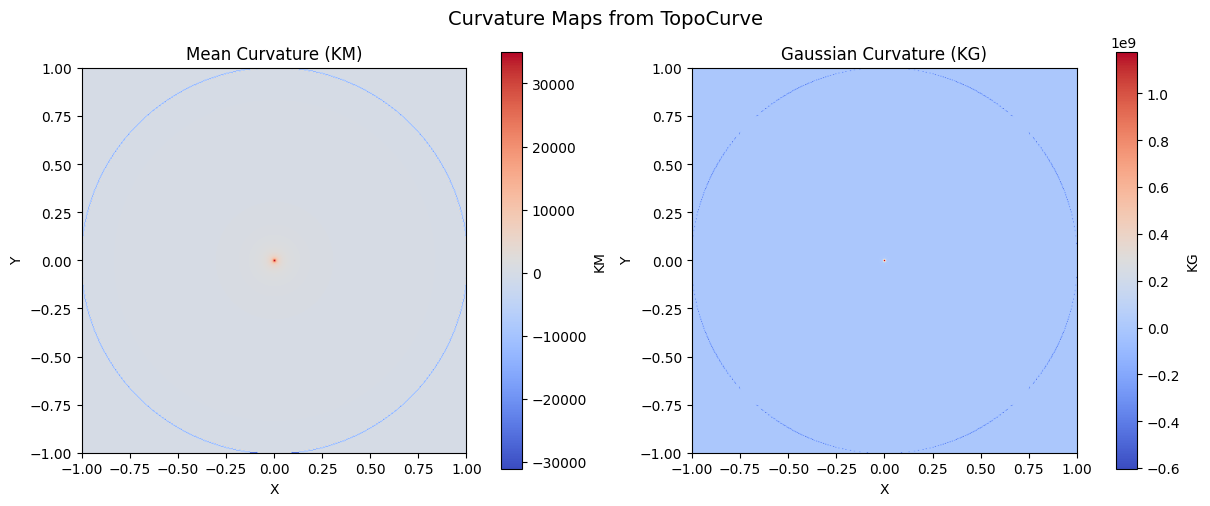

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Mean curvature map
im0 = axs[0].imshow(
    KM,
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin='lower',
    cmap='coolwarm'
)
axs[0].set_title('Mean Curvature (KM)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
cbar0 = fig.colorbar(im0, ax=axs[0])
cbar0.set_label('KM')

# Gaussian curvature map
im1 = axs[1].imshow(
    KG,
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin='lower',
    cmap='coolwarm'
)
axs[1].set_title('Gaussian Curvature (KG)')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
cbar1 = fig.colorbar(im1, ax=axs[1])
cbar1.set_label('KG')

plt.suptitle("Curvature Maps from TopoCurve", fontsize=14)
plt.show()